In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**LOAD DATA**


In [4]:
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
order_products_train = pd.read_csv('order_products__train.csv')
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')

In [5]:
orders.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [7]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [8]:
orders = orders.drop(columns=['days_since_prior_order'])
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day
0,2539329,1,prior,1,2,8
1,2398795,1,prior,2,3,7
2,473747,1,prior,3,3,12
3,2254736,1,prior,4,4,7
4,431534,1,prior,5,4,15
...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18
3421079,1854736,206209,prior,11,4,10
3421080,626363,206209,prior,12,1,12
3421081,2977660,206209,prior,13,1,12


In [9]:
orders.isnull().sum()

order_id             0
user_id              0
eval_set             0
order_number         0
order_dow            0
order_hour_of_day    0
dtype: int64

In [10]:
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01


In [11]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [12]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [13]:
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [14]:
products.describe()

,product_id,aisle_id,department_id
count,49688.000000,49688.000000,49688.000000
mean,24844.500000,67.769582,11.728687
std,14343.834425,38.316162,5.850410
min,1.000000,1.000000,1.000000
25%,12422.750000,35.000000,7.000000
50%,24844.500000,69.000000,13.000000
75%,37266.250000,100.000000,17.000000
max,49688.000000,134.000000,21.000000


In [15]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [16]:
order_products_prior.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [17]:
order_products_prior.describe()

,order_id,product_id,add_to_cart_order,reordered
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00


In [18]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [19]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [20]:
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [21]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [22]:
# Merge order data
order_products = pd.concat([order_products_prior, order_products_train])
order_products = order_products.merge(products, on='product_id', how='left')

In [23]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


In [24]:
order_counts = orders['user_id'].value_counts()
order_counts

152340    100
185641    100
185524    100
81678     100
70922     100
         ... 
13046       4
70208       4
111440      4
31762       4
47980       4
Name: user_id, Length: 206209, dtype: int64

 This plot shows the distribution of the number of orders per user. It helps identify the average number of orders per user and whether there are users with significantly more orders than others.

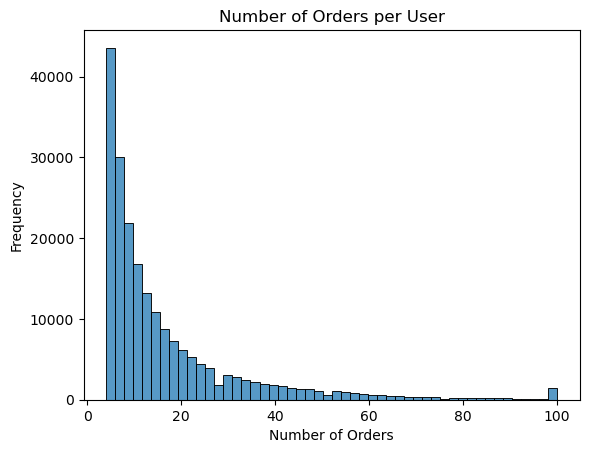

In [25]:
# Order distribution analysis
order_counts = orders['user_id'].value_counts()
sns.histplot(order_counts, kde=False, bins=50)
plt.title('Number of Orders per User')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()

This plot shows the number of orders placed on each day of the week. It helps identify the most and least popular days for placing orders.

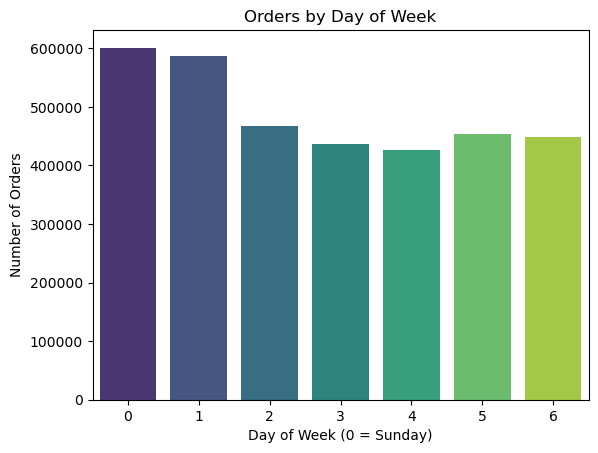

In [26]:
# Time analysis
sns.countplot(data=orders, x='order_dow', palette='viridis')
plt.title('Orders by Day of Week')
plt.xlabel('Day of Week (0 = Sunday)')
plt.ylabel('Number of Orders')
plt.show()

From the graph above we can see that maximum number of orders is on Sunday, followed by monday. which makes sense as people will want to buy groceries either at the weekend or start of the week. Mid-week has less number of orders with minimum orders on thursday

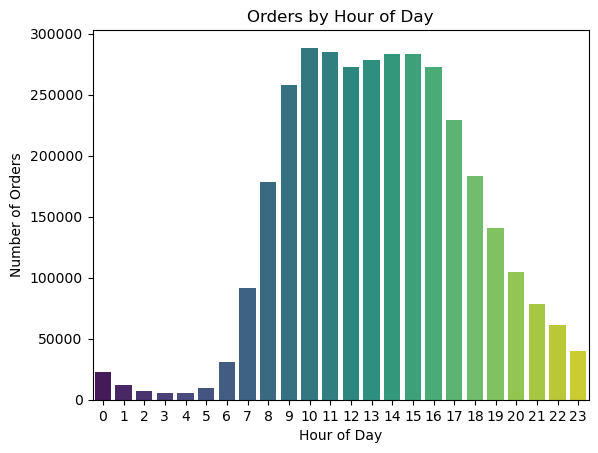

In [27]:
sns.countplot(data=orders, x='order_hour_of_day', palette='viridis')
plt.title('Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.show()

The above graph clearly depicats that maximum number of orders are in morning 10-11 am or in evening 3-4pm. At night between 1-5am orders are the least as that is when people are sleeping.

# Now we will group orders according to day of week and hour of day for better visualization.

In [28]:
orders_grouped = orders.groupby(['order_dow','order_hour_of_day'])['order_number'].aggregate('count').reset_index()
orders_grouped

,order_dow,order_hour_of_day,order_number
0,0,0,3936
1,0,1,2398
2,0,2,1409
3,0,3,963
4,0,4,813
...,...,...,...
163,6,19,18346
164,6,20,13392
165,6,21,10501
166,6,22,8532


In [29]:
#This table shows no. of orders on all days of week on a particular hour of day .
orders_grouped= orders_grouped.pivot('order_dow','order_hour_of_day', 'order_number')
orders_grouped

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


<Axes: xlabel='order_hour_of_day', ylabel='order_dow'>

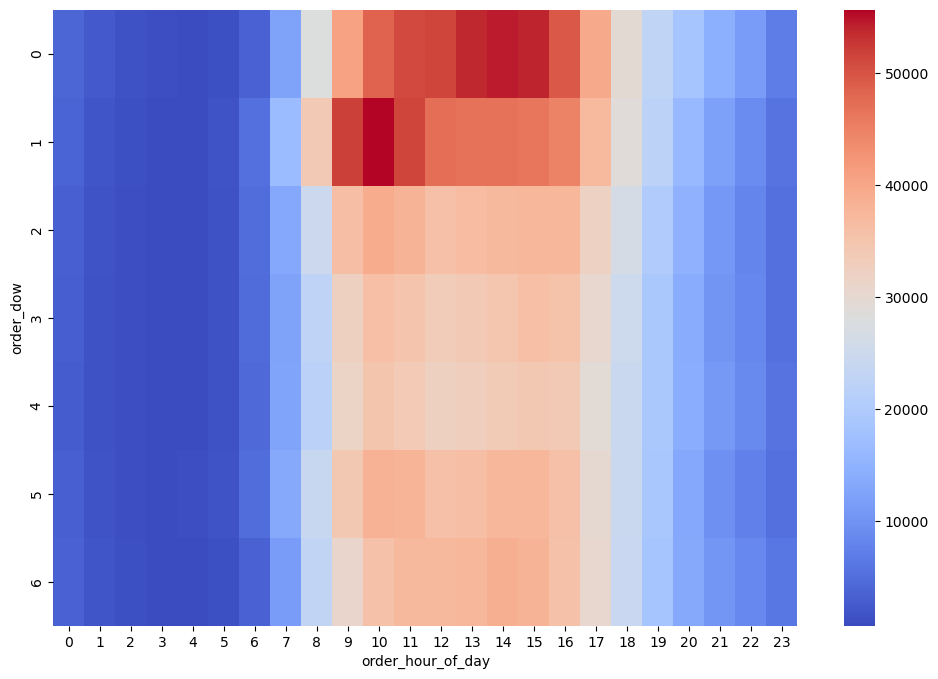

In [30]:
#Heatmap for visualization
plt.figure(figsize=(12,8))
sns.heatmap(orders_grouped, cmap='coolwarm')

From the heatmap above it is clear that peak orders are either on sunday 2 PM or on monday 10 AM.

<Axes: >

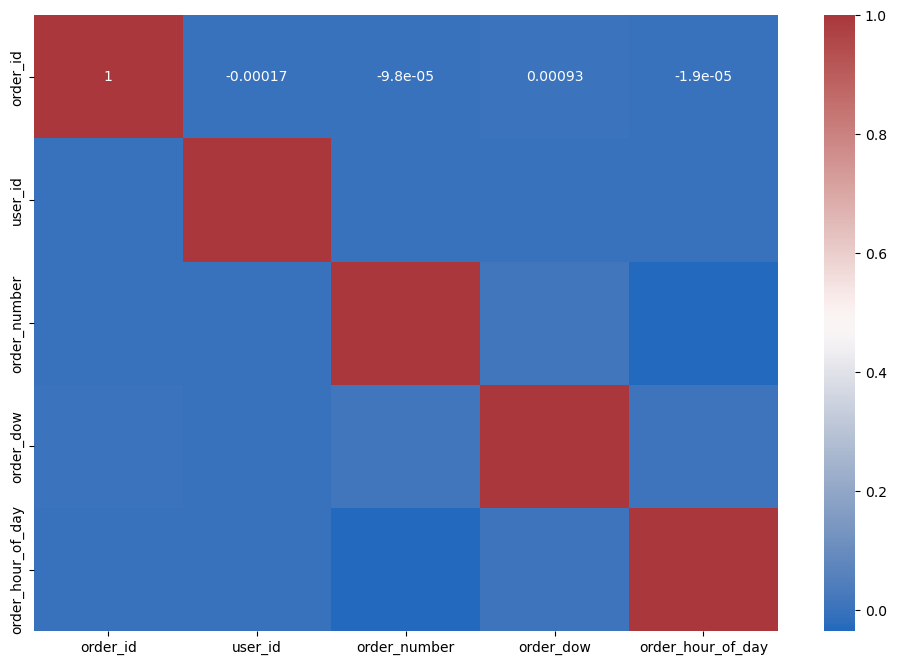

In [31]:
plt.figure(figsize=(12,8))

sns.heatmap(orders.corr(), cmap='vlag', annot=True)

## Top 10 reordered products
The reorder rate calculation shows which products are most frequently reordered. It helps identify products with high customer loyalty.


In [32]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


In [33]:
reorder_rate = order_products.groupby('product_id')['reordered'].mean().sort_values(ascending=False)
top_reordered_products = reorder_rate.head(10).reset_index()
top_reordered_products = top_reordered_products.merge(products[['product_id', 'product_name']], on='product_id', how='left')
top_reordered_products

,product_id,reordered,product_name
0,6433,0.942029,Raw Veggie Wrappers
1,2075,0.933333,Serenity Ultimate Extrema Overnight Pads
2,43553,0.923077,Orange Energy Shots
3,27740,0.921569,Chocolate Love Bar
4,14609,0.914286,Soy Powder Infant Formula
5,13875,0.911111,Simply Sleep Nighttime Sleep Aid
6,39992,0.909091,"Energy Shot, Grape Flavor"
7,5868,0.900000,Russian River Valley Reserve Pinot Noir
8,36543,0.898551,Bars Peanut Butter
9,26093,0.895522,Soy Crisps Lightly Salted


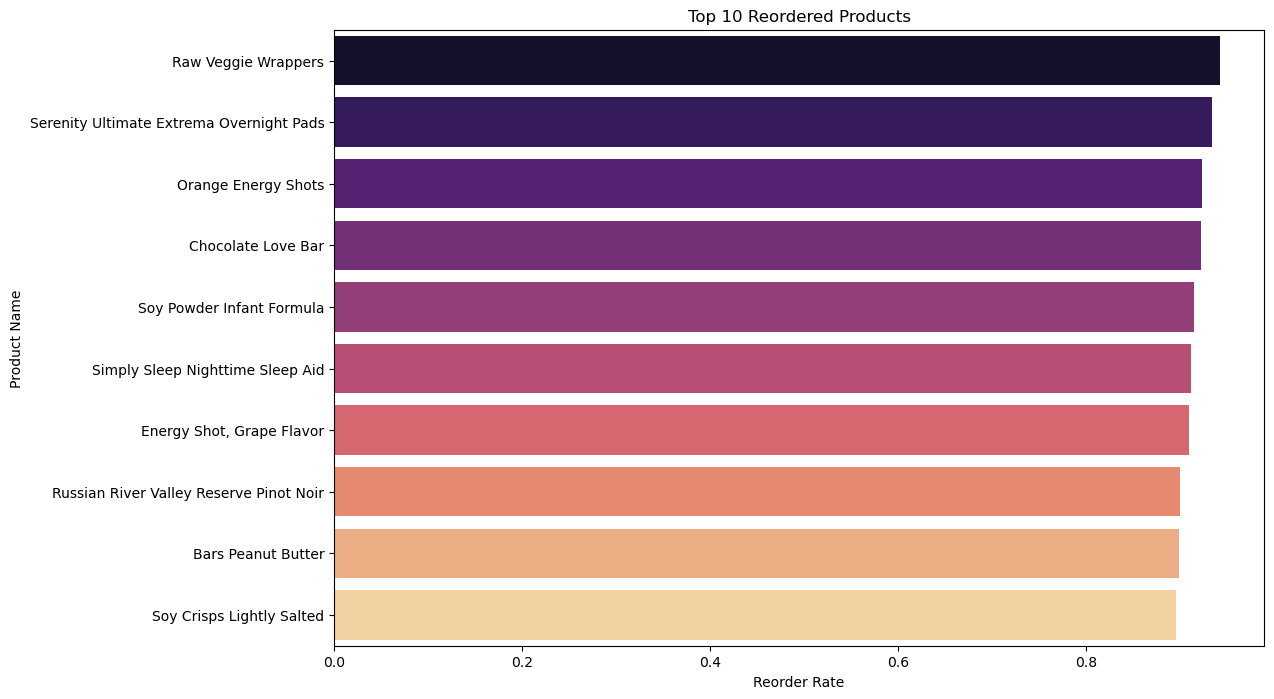

In [34]:
plt.figure(figsize=(12, 8))
sns.barplot(x='reordered', y='product_name', data=top_reordered_products, palette='magma')
plt.title('Top 10 Reordered Products')
plt.xlabel('Reorder Rate')
plt.ylabel('Product Name')
plt.show()

# Top 10 most ordered Products

In [35]:
top_products = order_products['product_name'].value_counts().head(10)
top_products

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

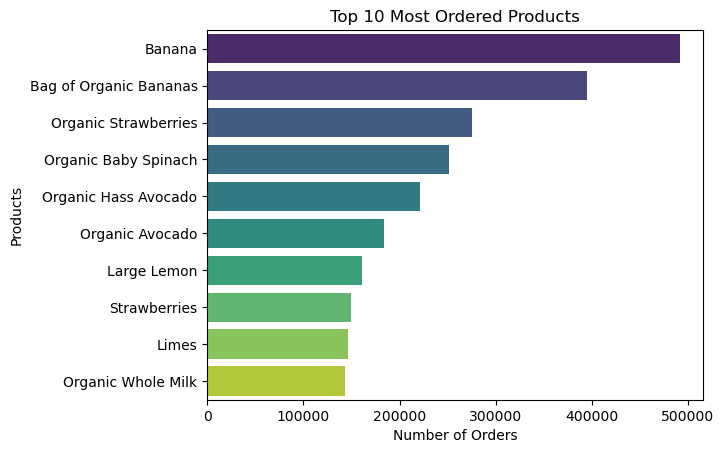

In [36]:
sns.barplot(y=top_products.index, x=top_products.values, palette='viridis')
plt.title('Top 10 Most Ordered Products')
plt.xlabel('Number of Orders')
plt.ylabel('Products')
plt.show()

# Top 10 Most Ordered Aisles

In [37]:
order_products = order_products.merge(aisles, on='aisle_id', how='left')



In [38]:
order_products = order_products.drop(columns=['aisle_x', 'aisle_y'], errors='ignore')

order_products.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients


In [39]:
top_aisles = order_products['aisle_id'].value_counts().head(10)
top_aisles = top_aisles.reset_index().merge(aisles, left_on='index', right_on='aisle_id', how='left')
top_aisles

,index,aisle_id_x,aisle_id_y,aisle
0,24,3792661,24,fresh fruits
1,83,3568630,83,fresh vegetables
2,123,1843806,123,packaged vegetables fruits
3,120,1507583,120,yogurt
4,21,1021462,21,packaged cheese
5,84,923659,84,milk
6,115,878150,115,water seltzer sparkling water
7,107,753739,107,chips pretzels
8,91,664493,91,soy lactosefree
9,112,608469,112,bread


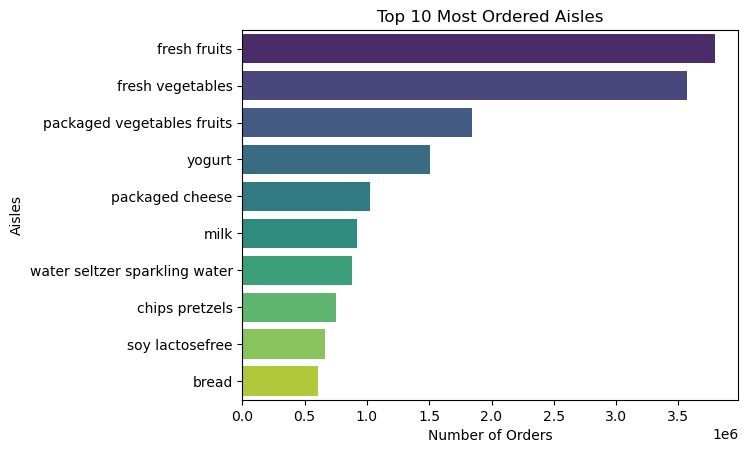

In [40]:
# Visualizing top aisles
sns.barplot(y=top_aisles['aisle'], x=top_aisles['aisle_id_x'], palette='viridis')
plt.title('Top 10 Most Ordered Aisles')
plt.xlabel('Number of Orders')
plt.ylabel('Aisles')
plt.show()

**Market Basket Analysis**

In [42]:
from mlxtend.frequent_patterns import apriori, association_rules

In [51]:
product_counts = order_products.groupby('product_id')['order_id'].count().reset_index().rename(columns = {'order_id':'frequency'})
product_counts = product_counts.sort_values('frequency', ascending=False)[0:100].reset_index(drop=True)
product_counts.head(10)

,product_id,frequency
0,24852,491291
1,13176,394930
2,21137,275577
3,21903,251705
4,47209,220877
5,47766,184224
6,47626,160792
7,16797,149445
8,26209,146660
9,27845,142813


In [52]:
freq_products = list(product_counts.product_id)
freq_products[1:10]

[13176, 21137, 21903, 47209, 47766, 47626, 16797, 26209, 27845]

In [53]:
order_products = order_products[order_products.product_id.isin(freq_products)]
order_products.shape

c:\Users\91776\anaconda3\lib\site-packages\pandas\core\algorithms.py:516: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps.dtype], [])


(7795471, 8)

In [54]:
basket = order_products.pivot_table(columns='product_name', values='reordered', index='order_id').reset_index().fillna(0).set_index('order_id')

In [55]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
basket = basket.applymap(encode_units)
basket.head()

product_name,100% Raw Coconut Water,100% Whole Wheat Bread,2% Reduced Fat Milk,Apple Honeycrisp Organic,Asparagus,Bag of Organic Bananas,Banana,Bartlett Pears,Blueberries,Boneless Skinless Chicken Breasts,...,Sparkling Natural Mineral Water,Sparkling Water Grapefruit,Spring Water,Strawberries,Uncured Genoa Salami,Unsalted Butter,Unsweetened Almondmilk,Unsweetened Original Almond Breeze Almond Milk,Whole Milk,Yellow Onions
order_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Apply Apriori algorithm

In [60]:
shortbasket = basket[:100]

In [61]:
frequent_items = apriori(shortbasket, min_support=0.01, use_colnames=True)
frequent_items.head()

c:\Users\91776\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.01,(100% Whole Wheat Bread)
1,0.04,(2% Reduced Fat Milk)
2,0.01,(Apple Honeycrisp Organic)
3,0.03,(Asparagus)
4,0.14,(Bag of Organic Bananas)


In [62]:
rules = association_rules(frequent_items, metric='lift', min_threshold=1)
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5493,"(Organic Italian Parsley Bunch, Organic Raspbe...","(Bag of Organic Bananas, Organic Zucchini, Unc...",0.01,0.01,0.01,1.000000,100.000000,0.0099,inf,1.000000
3531,"(Organic Garlic, Organic Cilantro)","(Organic Lemon, Organic Italian Parsley Bunch)",0.01,0.01,0.01,1.000000,100.000000,0.0099,inf,1.000000
7720,"(Organic Italian Parsley Bunch, Organic Raspbe...","(Organic Zucchini, Bag of Organic Bananas, Org...",0.01,0.01,0.01,1.000000,100.000000,0.0099,inf,1.000000
7722,"(Bag of Organic Bananas, Organic Garlic)","(Organic Zucchini, Organic Italian Parsley Bun...",0.01,0.01,0.01,1.000000,100.000000,0.0099,inf,1.000000
7723,"(Organic Garlic, Uncured Genoa Salami)","(Organic Zucchini, Bag of Organic Bananas, Org...",0.01,0.01,0.01,1.000000,100.000000,0.0099,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
101,(Organic Baby Spinach),(Banana),0.07,0.10,0.01,0.142857,1.428571,0.0030,1.050000,0.322581
36,(Organic Avocado),(Bag of Organic Bananas),0.06,0.14,0.01,0.166667,1.190476,0.0016,1.032000,0.170213
56,(Bag of Organic Bananas),(Organic Lemon),0.14,0.06,0.01,0.071429,1.190476,0.0016,1.012308,0.186047
57,(Organic Lemon),(Bag of Organic Bananas),0.06,0.14,0.01,0.166667,1.190476,0.0016,1.032000,0.170213


**Interpretation of Results:**

**Support**: If a rule has a support of 0.01, it means that 1% of all transactions contain this itemset.

**Confidence**: If a rule has a confidence of 0.7, it means that 70% of the transactions containing the antecedent also contain the consequent.

**Lift**: If a rule has a lift of 1.5, it means that transactions containing the antecedent are 1.5 times more likely to also contain the consequent than transactions selected at random.